# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data analysis/Mouse_metadata.csv"
study_results_path = "data analysis/Study_results.csv"
# Read the mouse data and the study results
Mouse_metadata_path = "data analysis/Mouse_metadata.csv"
Study_results_path = "data analysis/Study_results.csv"

# Combine the data into a single DataFrame
combined_df = pd.merge('data analysis/Mouse_metadata.csv', 'data analysis/Study_results.csv', how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()

TypeError: Can only merge Series or DataFrame objects, a <class 'str'> was passed

In [70]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

NameError: name 'combined_df' is not defined

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
clean_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_mice_ID

NameError: name 'merge_df' is not defined

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice

NameError: name 'merge_df' is not defined

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mice_dup_del[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
clean_data

NameError: name 'mice_dup_del' is not defined

In [16]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique(), clean_df['Mouse ID'].count()

NameError: name 'clean_df' is not defined

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen = clean_df.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
average_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].mean(),2)
median_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].median(),2)
variance_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].var(),2)
std_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].std(),2)
sem_tumor_vol = round(drug_regimen["Tumor Volume (mm3)"].sem(),2)
# Assemble the resulting series into a single summary DataFrame.
drugsummary_df = pd.DataFrame({"Mean Tumor Volume": average_tumor_vol,
                              "Median Tumor Volume": median_tumor_vol,
                              "Tumor Volume Variance": variance_tumor_vol,
                              "Tumor Volume Std. Dev.": std_tumor_vol,
                              "Tumor Volume Std. Err.": sem_tumor_vol
                              })
drugsummary_df


NameError: name 'clean_df' is not defined

In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

NameError: name 'clean_df' is not defined

## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_pd =  clean_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)

NameError: name 'clean_df' is not defined

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_pd.plot(kind='bar', facecolor='steelblue', figsize=(5,4), title='Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()


NameError: name 'bar_pd' is not defined

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pie_pd =  clean_df['Sex'].value_counts()
pie_pd.plot(kind='pie', autopct='%1.1f%%', figsize=(6,5), title="Mice Gender in Study")
plt.show()
plt.tight_layout()
# Get the unique mice with their gender


# Make the pie chart


NameError: name 'clean_df' is not defined

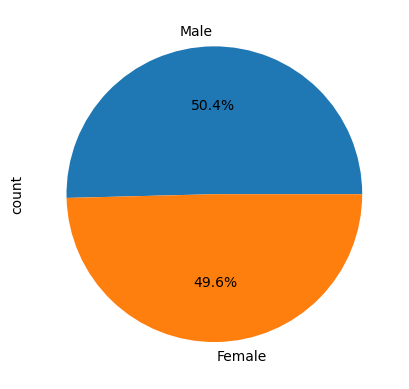

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_capo = capomulin.groupby('Mouse ID').max()['Timepoint']
last_rami = ramicane.groupby('Mouse ID').max()['Timepoint']
last_infu = infubinol.groupby('Mouse ID').max()['Timepoint']
last_ceft = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
vol_capo = pd.DataFrame(last_capo)
capo_merge = pd.merge(vol_capo, clean_df, on=("Mouse ID", "Timepoint"), how="left")
vol_rami = pd.DataFrame(last_rami)
rami_merge = pd.merge(vol_rami, clean_df, on=("Mouse ID", "Timepoint"), how="left")
vol_infu = pd.DataFrame(last_infu)
infu_merge = pd.merge(vol_infu, clean_df, on=("Mouse ID", "Timepoint"), how="left")
vol_ceft = pd.DataFrame(last_ceft)
ceft_merge = pd.merge(vol_ceft, clean_df, on=("Mouse ID", "Timepoint"), how="left")


NameError: name 'clean_df' is not defined

In [25]:
# Capomulin
capo_volume = capo_merge['Tumor Volume (mm3)']
capo_volume = capo_volume.astype('int64')
quartiles1 = capo_volume.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lowerbound1 = lowerq1 - (1.5*iqr1)
upperbound1 = upperq1 + (1.5*iqr1)
print(f"Capomulin Potential Outliers: Below: {lowerbound1} and Above: {upperbound1}.")

# Ramicane 
rami_volume = rami_merge['Tumor Volume (mm3)']
rami_volume = rami_volume.astype('int64')
quartiles2 = rami_volume.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lowerbound2 = lowerq2 - (1.5*iqr2)
upperbound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane Potential Outliers: Below: {lowerbound2} and Above: {upperbound2}.")

# Infubinol 
infu_volume = infu_merge['Tumor Volume (mm3)']
infu_volume = infu_volume.astype('int64')
quartiles3 = infu_volume.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lowerbound3 = lowerq3 - (1.5*iqr3)
upperbound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol Potential Outliers: Below: {lowerbound3} and Above: {upperbound3}.")

# Ceftamin 
ceft_volume = ceft_merge['Tumor Volume (mm3)']
ceft_volume = ceft_volume.astype('int64')
quartiles4 = ceft_volume.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lowerbound4 = lowerq4 - (1.5*iqr4)
upperbound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin Potential Outliers: Below: {lowerbound4} and Above: {upperbound4}.")

NameError: name 'capo_merge' is not defined

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot_regimen = [capo_volume, rami_volume, infu_volume, ceft_volume]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(boxplot_regimen, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

NameError: name 'capo_volume' is not defined

## Line and Scatter Plots

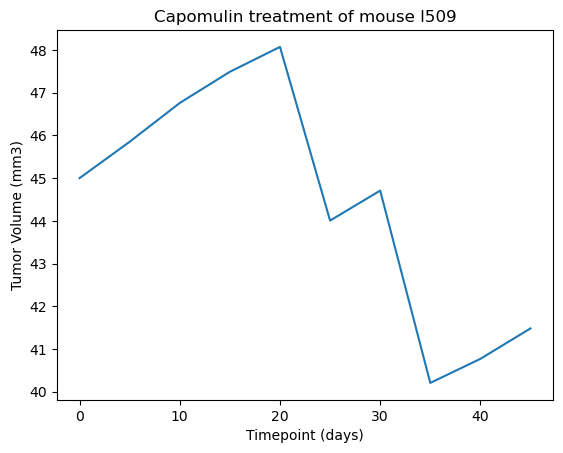

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


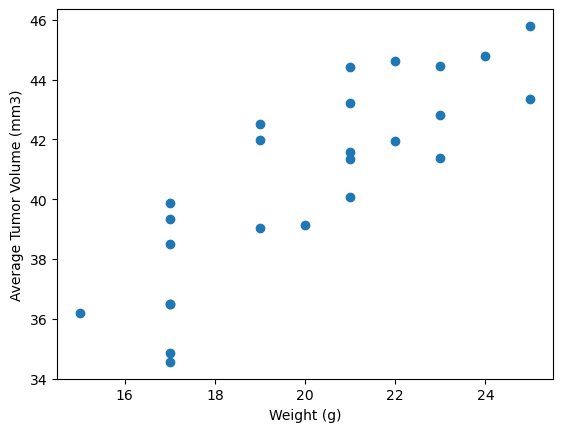

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


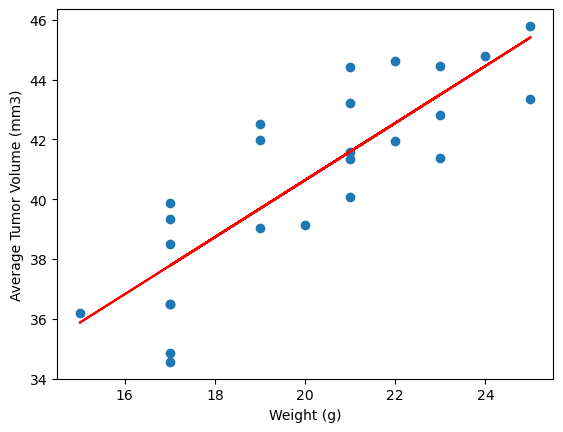

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
